<a href="https://colab.research.google.com/github/ironhide554/CODSOFT/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [79]:
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
df.isnull().sum() # Checking of NULL Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
Survived = df[df['Survived'] == 1]
Non_Survived = df[df['Survived'] == 0]
outlierFraction = len(Survived)/float(len(Non_Survived))
print(outlierFraction)
print('Survived: {}'.format(len(Survived)))
print('Non_Survived: {}'.format(len(Non_Survived)))

0.6229508196721312
Survived: 342
Non_Survived: 549


<Axes: xlabel='Survived', ylabel='count'>

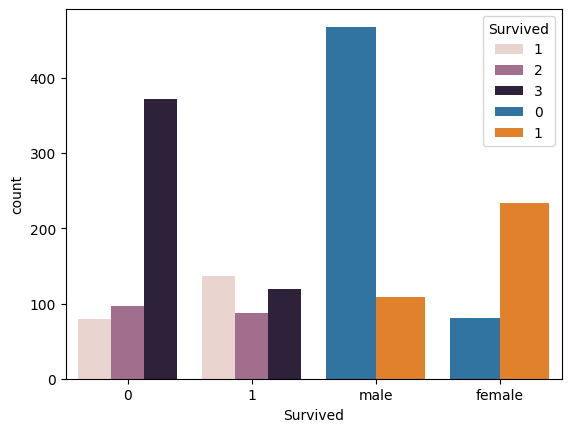

In [85]:
sns.countplot(x=df['Survived'], hue= df['Pclass'])
sns.countplot(x=df['Sex'], hue= df['Survived'])

In [119]:
labelencoder = LabelEncoder() # Conversion of Categorical values into Numerical values
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [87]:
features = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
target = df["Survived"]

In [90]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
df.duplicated().any()

False

In [93]:
x=df[['Pclass', 'Sex']]
y=target

In [99]:
x_train , x_test, y_train, y_test = train_test_split(features,y, test_size= 0.2, random_state= 0)

from sklearn.impute import SimpleImputer # It is used to fill the missing values of the dataset.
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [101]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_imputed, y_train)

RandomForestClassifier()

In [102]:
predictions = model.predict(x_test_imputed)

In [104]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
acc = accuracy_score(y_test , predictions)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test , predictions)
print("The precision is {}".format(prec))

rec = recall_score(y_test , predictions)
print("The recall is {}".format(rec))

f1 = f1_score(y_test , predictions)
print("The F1-Score is {}".format(f1))

The accuracy is 0.8156424581005587
The precision is 0.8103448275862069
The recall is 0.6811594202898551
The F1-Score is 0.7401574803149606


In [107]:
import joblib
joblib.dump(model,"Titanic_Survival")

['Titanic_Survival']

In [108]:
m = joblib.load("Titanic_Survival")

In [116]:
prediction  = m.predict([[1,1,0,1,1,1]])
prediction

array([1])

In [117]:

if prediction==0:
  print("Non Survived")
else:
  print("Survived")

Survived
